### Kalman Filter

#### Simulation of velocity measurements

In [34]:
import random 

measurementTime = 200
errorSD = 10
errorVector = []
measuredVel = []

for n in range(1,measurementTime):
    errorVector.append((random.uniform(-errorSD,errorSD)))
    measuredVel.append(80 + errorVector[n-1] )


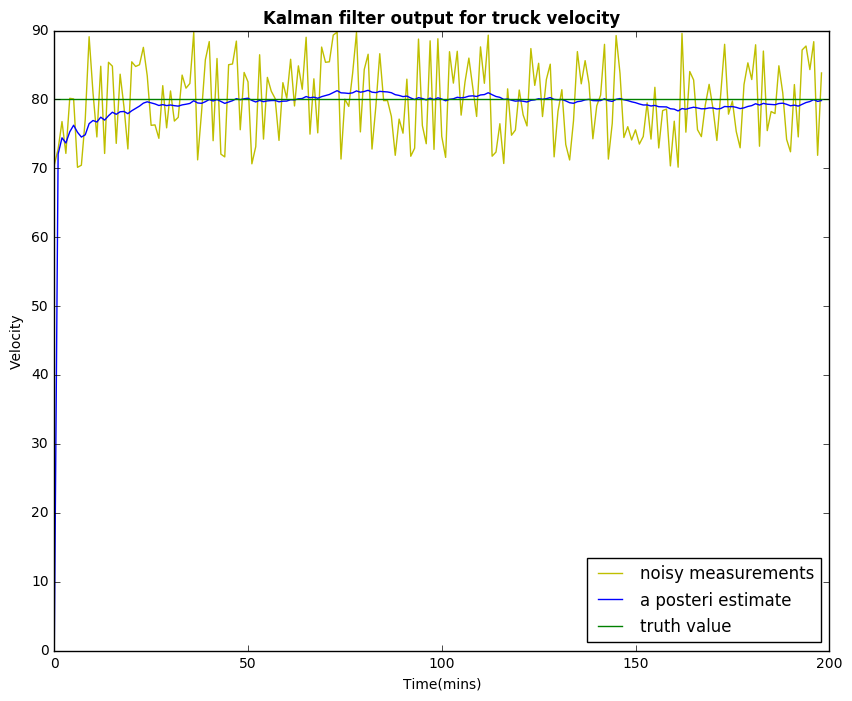

In [37]:
# Estimating truk velocity over time
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
n_iter = measurementTime -1
sz = (n_iter,) # size of array
x = 80 # truth value 
z = measuredVel # observations 

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'y',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend(loc ='lower right' )
plt.title('Kalman filter output for truck velocity', fontweight='bold')
plt.xlabel('Time(mins)')
plt.ylabel('Velocity')


plt.show()

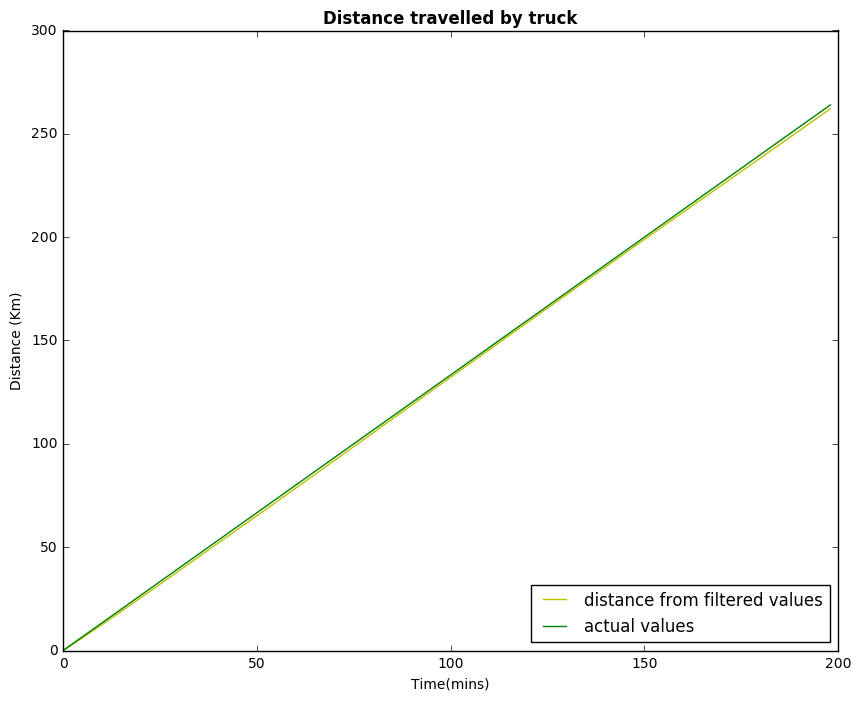

In [93]:
# Estimating truck position over time

position = [0] # position at time zero
actualpos =[0]

for n in range(1, n_iter):
    position.append(position[n-1] + ((xhat[n]*(1/60.0))))
    actualpos.append(actualpos[n-1] + (80*(1/60.0)))
    
plt.figure()
plt.plot(position,'y',label='distance from filtered values')
plt.plot(actualpos,'g-',label='actual values')

plt.title('Distance travelled by truck', fontweight='bold')
plt.legend(loc ='lower right' )
plt.xlabel('Time(mins)')
plt.ylabel('Distance (Km)')


plt.show()

### Part B based on position error

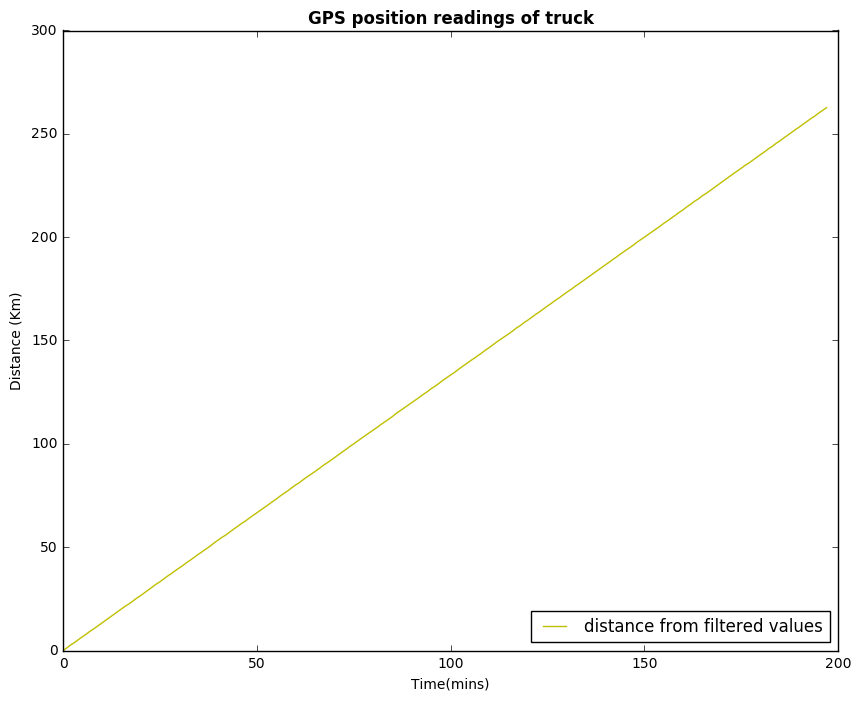

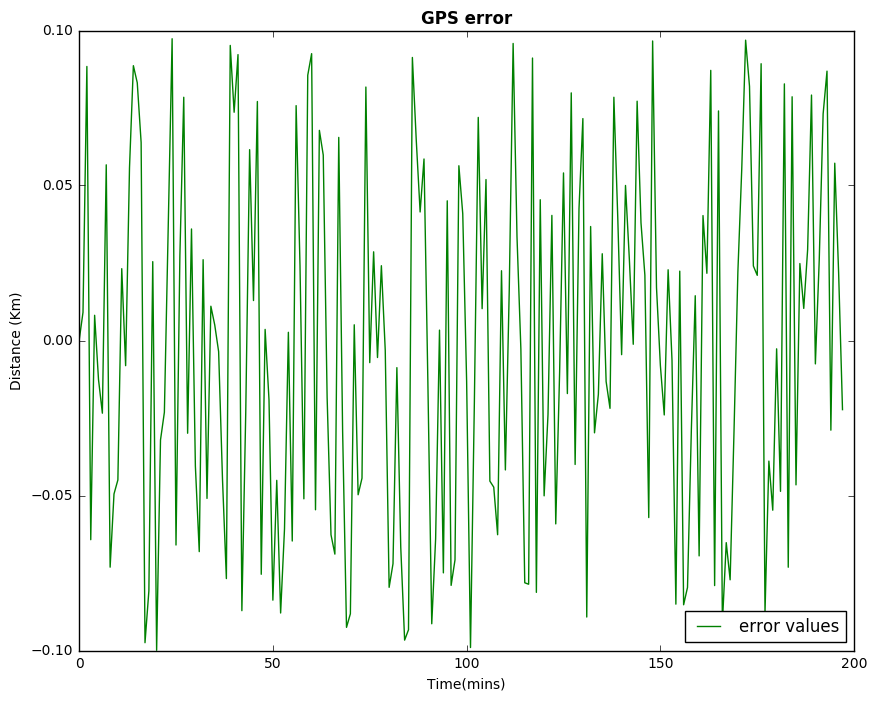

In [108]:
# simulation of GPS values
GPSpos = [0]
posError = 0.1
GPSError =[0]
for n in range(1, n_iter-1):
    GPSError.append(random.uniform(-posError,posError))
    GPSpos.append( actualpos[n] + GPSError[n])

plt.figure()
plt.plot(GPSpos,'y',label='distance from filtered values')

plt.title('GPS position readings of truck', fontweight='bold')
plt.legend(loc ='lower right' )
plt.xlabel('Time(mins)')
plt.ylabel('Distance (Km)')

plt.figure()
plt.plot(GPSError,'g',label='error values')

plt.title('GPS error', fontweight='bold')
plt.legend(loc ='lower right' )
plt.xlabel('Time(mins)')
plt.ylabel('Distance (Km)')

plt.show()



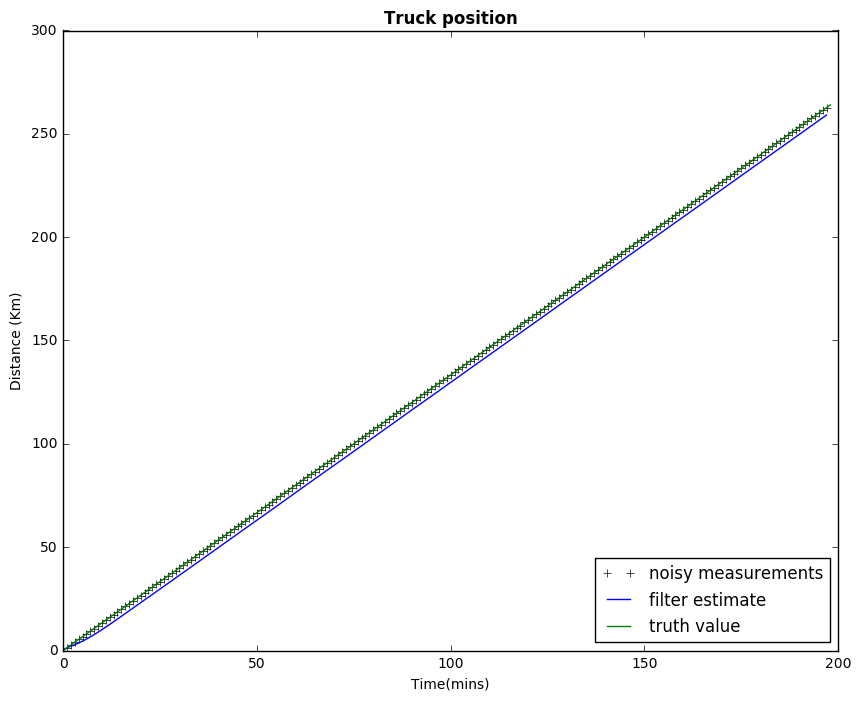

In [125]:
#Position of truck according to kalman filtering of GPS + distance values

plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
n_iter = measurementTime -2
sz = (n_iter,) # size of array
x = actualpos # truth value 
z = GPSpos # observations 

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.01**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='filter estimate')
plt.plot(x,color='g',label='truth value')
plt.legend(loc ='lower right' )
plt.title('Truck position', fontweight='bold')
plt.xlabel('Time(mins)')
plt.ylabel('Distance (Km)')


plt.show()
